In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('winequality-red.csv')

Understanding data 

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df['quality'].value_counts() # Data seems to be imbalanced

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Data cleaning

In [10]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(240)

In [12]:
def wine_quality(quality):  # Since data is imbalanced, we will make it into a binary classification problem by combining target variables into 1 & 0                    
    if quality in range(0,6):
        return 0
    elif quality in range(6,11):
        return 1

In [13]:
df['quality']=df['quality'].apply(wine_quality)

In [14]:
df['quality'].unique()

array([0, 1])

In [15]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [16]:
feature_cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
] # List of feature columns (excluding the target)

In [17]:
# Find feature duplicates with conflicting quality labels
conflicting = df.duplicated(subset=feature_cols, keep=False)

In [18]:
# All duplicates by features
conflict_groups = df[conflicting].groupby(feature_cols)['quality'].nunique()
rows_to_remove = conflict_groups[conflict_groups > 1].reset_index()[feature_cols]

In [19]:
# Merge to find all rows to drop
to_remove = df.merge(rows_to_remove, on=feature_cols, how='inner').index
df_cleaned = df.drop(to_remove)

In [20]:
df_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [21]:
df_cleaned.shape # Turns out for every unique combination of features, there is only one corresponding quality value. No duplicates

(1599, 12)

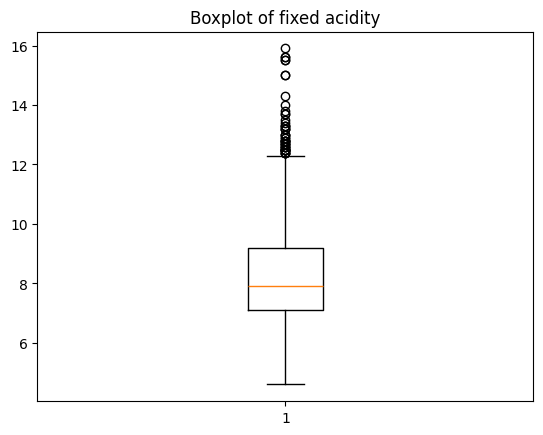

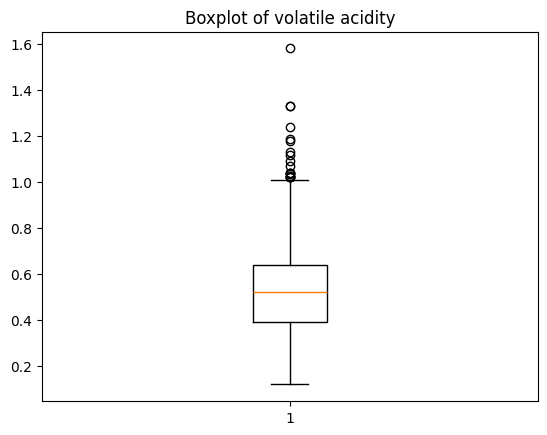

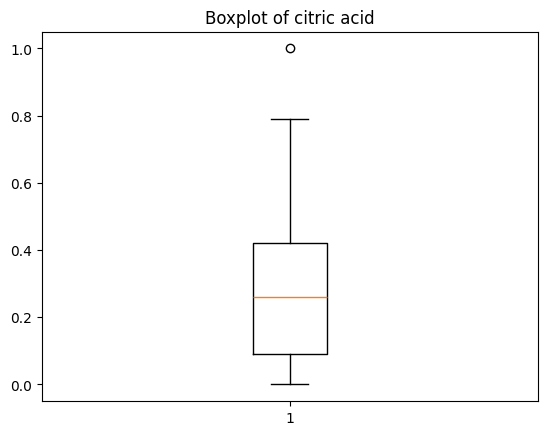

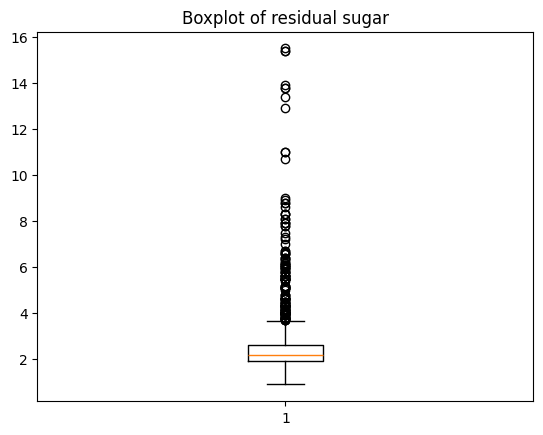

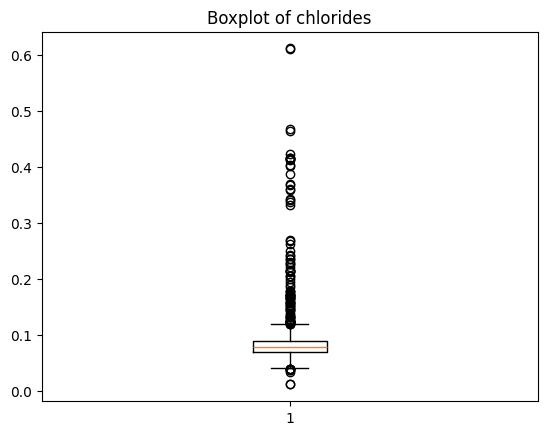

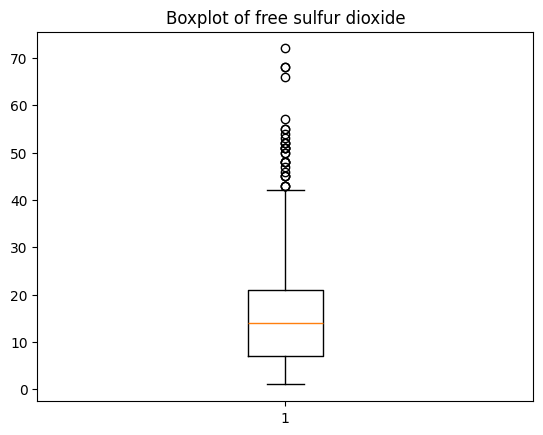

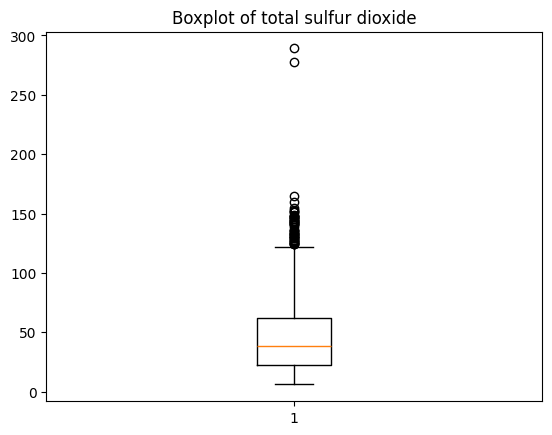

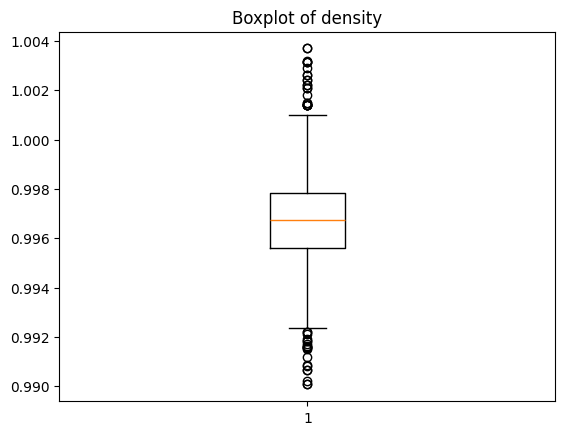

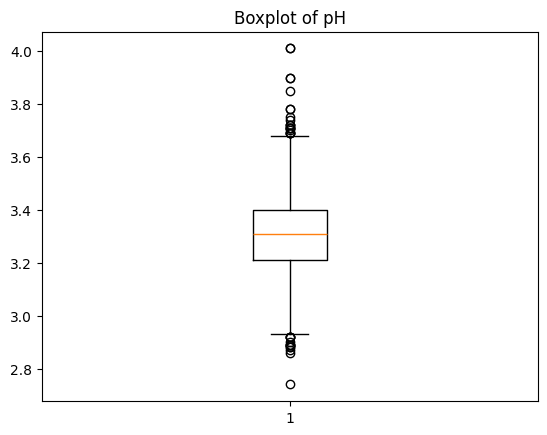

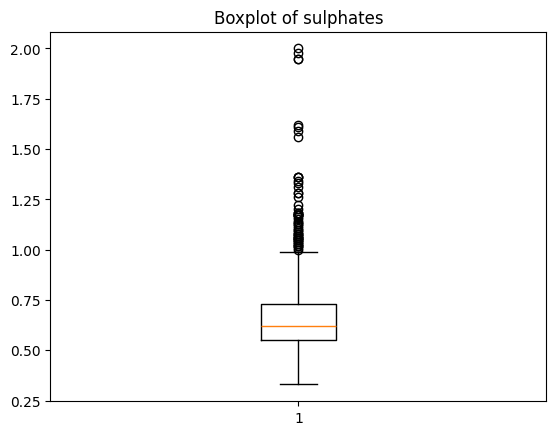

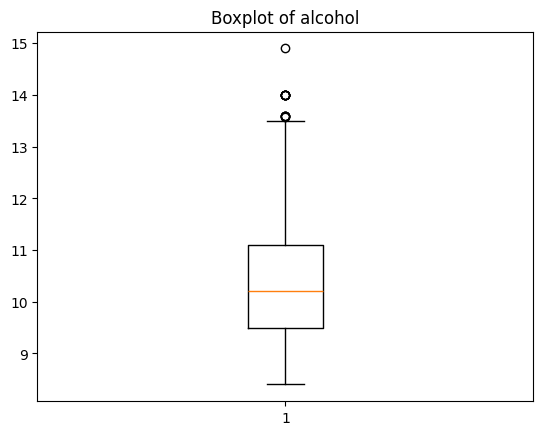

In [22]:
for col in feature_cols:
    if df[col].dtype in ['float','int64'] :
        plt.boxplot(df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [23]:
for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

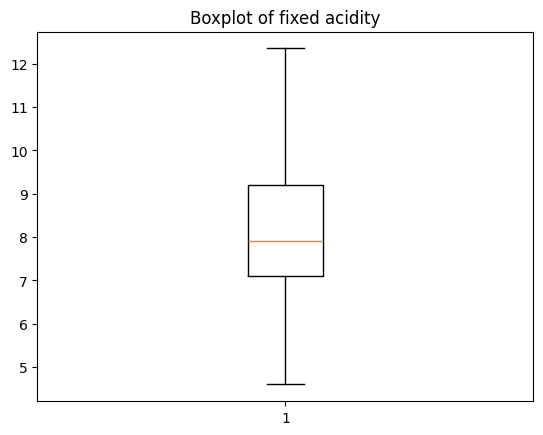

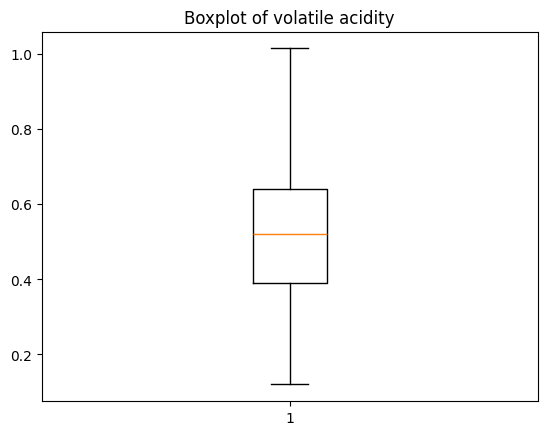

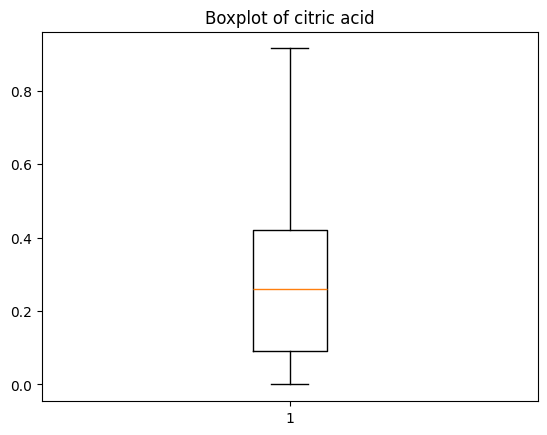

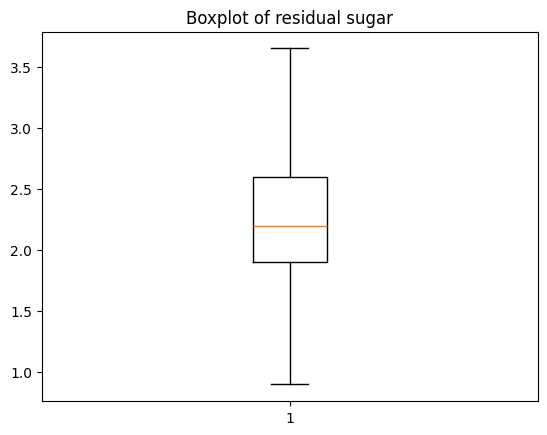

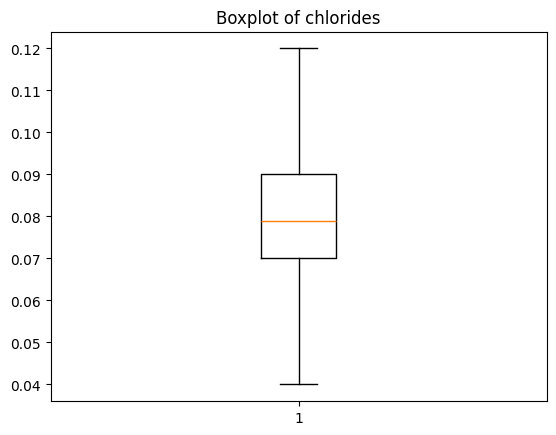

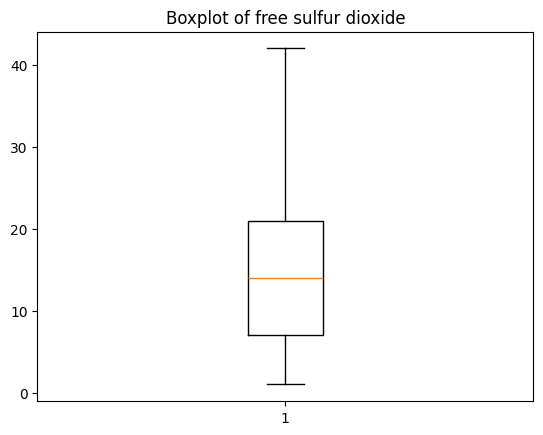

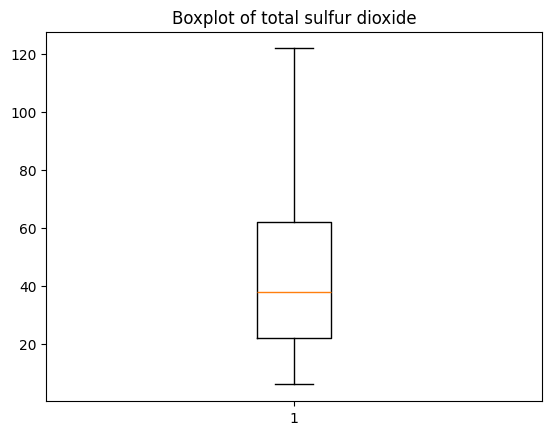

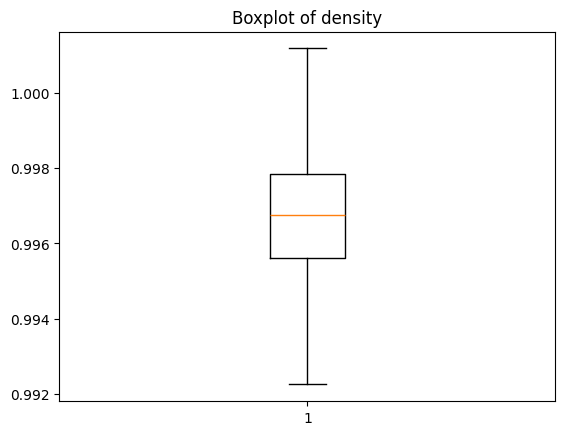

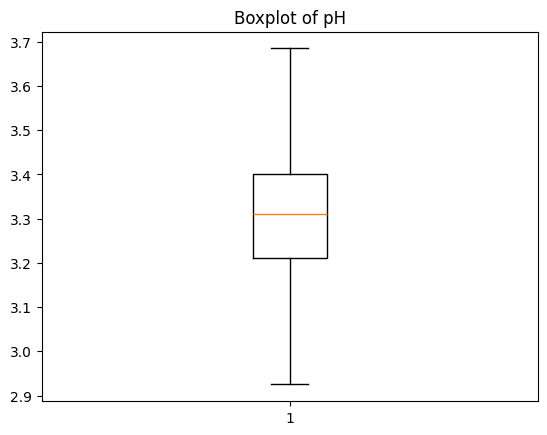

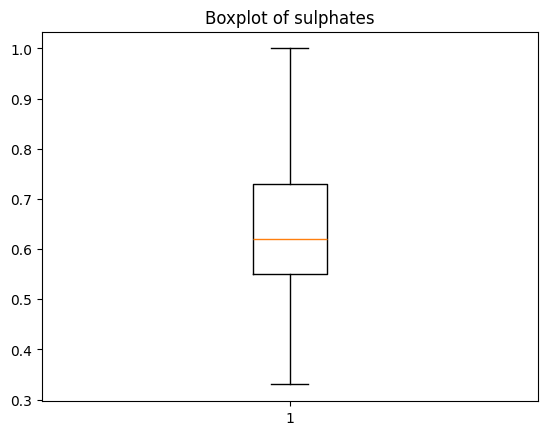

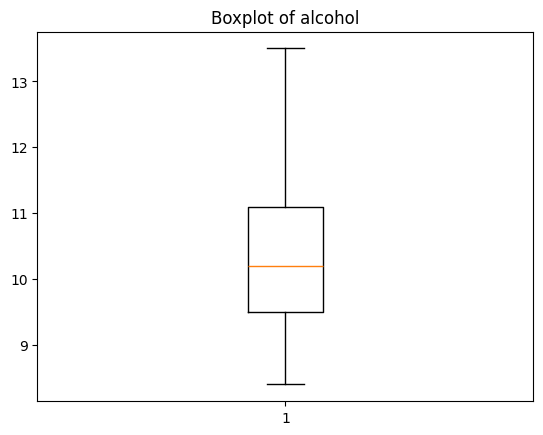

In [24]:
for col in feature_cols:
    if df[col].dtype in ['float','int64'] :
        plt.boxplot(df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

Encoding

In [ ]:
le_quality=LabelEncoder()
df["quality"]=le_quality.fit_transform(df["quality"])

In [26]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

Scaling

In [27]:
X=df.drop(columns=['quality'])
y=df['quality']

In [28]:
minmax= MinMaxScaler()
X_scaled=minmax.fit_transform(X)

In [29]:
X_scaled

array([[0.36129032, 0.64804469, 0.        , ..., 0.76973684, 0.34328358,
        0.19607843],
       [0.41290323, 0.84916201, 0.        , ..., 0.36184211, 0.52238806,
        0.2745098 ],
       [0.41290323, 0.7150838 , 0.04371585, ..., 0.44078947, 0.47761194,
        0.2745098 ],
       ...,
       [0.21935484, 0.43575419, 0.1420765 , ..., 0.65131579, 0.62686567,
        0.50980392],
       [0.16774194, 0.58659218, 0.13114754, ..., 0.84868421, 0.56716418,
        0.35294118],
       [0.18064516, 0.2122905 , 0.5136612 , ..., 0.61184211, 0.49253731,
        0.50980392]], shape=(1599, 11))

Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Selection

In [31]:
models=[KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier()]

In [32]:
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(model) # To print model name as a heading
    print("__________________")
    print(round(accuracy_score(y_test, y_pred)*100))
    print(classification_report(y_test, y_pred))
    print('\n')

KNeighborsClassifier()
__________________
72
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       141
           1       0.73      0.78      0.76       179

    accuracy                           0.72       320
   macro avg       0.72      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320



SVC()
__________________
76
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       141
           1       0.79      0.77      0.78       179

    accuracy                           0.76       320
   macro avg       0.75      0.76      0.75       320
weighted avg       0.76      0.76      0.76       320



GaussianNB()
__________________
74
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       141
           1       0.80      0.70      0.75       179

    accuracy                           0.74       320
   macro avg    

In [33]:
best_model=SVC()
best_model.fit(X_train, y_train)


SVC()

In [34]:
y_pred_best_model = best_model.predict(X_test)